In [2]:
import lightgbm as lgb
from colorthief import ColorThief
import colorsys
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
# load model
gbm=lgb.Booster(model_file='./model_withFilter.txt')

In [4]:
# param: palette,eg:[(r,g,b),(r,g,b),(r,g,b),(r,g,b),(r,g,b)]
# return style ['cute','fresh','technology']
def style_predict(palette):
    def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
    # build a color palette
    palette.sort(key=sortByLight2,reverse=True)
    palette1=[*palette[0],*palette[1],*palette[2],*palette[3],*palette[4]]
    for c in palette:
        h,l,s=colorsys.rgb_to_hls(*c)
        palette1=[*palette1,h,l,s]
    x=pd.Series(palette1)
    y_pred = gbm.predict(x, num_iteration=gbm.best_iteration)
    pred_Y=[0 for i in range(len(y_pred))]
    y_pred=y_pred.tolist()
    style=['cute','fresh','technology']
    for i in range(len(y_pred)):
        pred_Y[i]=y_pred[i][:].index(max(y_pred[i][:]))
    print("Probability：",y_pred)
    return style[pred_Y[0]]

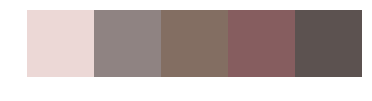

Probability： [[0.9003913424500601, 0.010299603692143727, 0.08930905385779628]]
cute


E:\Users\ASUS\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [12]:
# test, show the palette extract from image, and the style prediction for the palette
color_thief = ColorThief('F:\doc\Contests\Intel\style_classfier\Style_classifier\datacute\cute_0.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=5,quality=1)
def sortByLight2(elem):
    hls=colorsys.rgb_to_hls(*elem)
    return hls[1]
palette.sort(key=sortByLight2,reverse=True)
im1=Image.new("RGB",(len(palette)*50,1*50))
for i,color in enumerate(palette):
    for y in range(50):
        for x in range(50):
            im1.putpixel((x+i*50,y),color)
plt.imshow(im1)
plt.axis('off')
plt.show()
print(style_predict(palette))

In [13]:
palette

[(46, 175, 231), (76, 140, 144), (9, 102, 179), (6, 71, 130), (4, 23, 47)]